## Дашборд для телекоммуникационной компании

**Цель проекта**: создать дашборд, который позволит определить текущий уровень потребительской лояльности, или NPS (от англ. Net Promoter Score), среди клиентов из России

### Импорт бибилиотек

In [1]:
import pandas as pd
from sqlalchemy import create_engine

### Получение и загрузка данных

In [2]:
query = """
SELECT user_id,
       lt_day,
       CASE
           WHEN lt_day <= 365 THEN '1'
           ELSE '0'
       END AS is_new,
       age,
       CAST(gender_segment AS varchar) gender_segment,
       os_name,
       cpe_type_name,
       l.country,
       l.city,
       substr(ag.title, instr(ag.title, ' ') + 1) AS age_segment,
       substr(ts.title, instr(ts.title, ' ') + 1) AS traffic_segment,
       substr(ls.title, instr(ls.title, ' ') + 1) AS lifetime_segment,
       nps_score,
       CASE
           WHEN nps_score <= 6 THEN 'критики'
           WHEN nps_score <= 8 THEN 'нейтралы'
           ELSE 'сторонники'
       END AS nps_group
FROM user u
LEFT JOIN location l on u.location_id = l.location_id
LEFT JOIN age_segment ag on u.age_gr_id = ag.age_gr_id 
LEFT JOIN traffic_segment ts on u.tr_gr_id = ts.tr_gr_id
LEFT JOIN lifetime_segment ls on u.lt_gr_id = ls.lt_gr_id
"""

In [3]:
try:
    path_to_db = './telecomm_csi.db' # локальный запуск
    engine = create_engine(f'sqlite:///{path_to_db}', echo = False)
    df = pd.read_sql(query, engine) 
except:
    path_to_db = '/datasets/telecomm_csi.db' #среда Практикума
    engine = create_engine(f'sqlite:///{path_to_db}', echo = False)
    df = pd.read_sql(query, engine)
    
df

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,0,45.0,1.0,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,сторонники
1,A001WF,2344,0,53.0,0.0,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,сторонники
2,A003Q7,467,0,57.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,сторонники
3,A004TB,4190,0,44.0,1.0,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,сторонники
4,A004XT,1163,0,24.0,0.0,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,сторонники
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502488,ZZZKLD,1249,0,54.0,1.0,ANDROID,SMARTPHONE,Россия,Москва,45-54,1-5,36+,5,критики
502489,ZZZLWY,129,1,31.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,25-34,1-5,4-6,8,нейтралы
502490,ZZZQ5F,522,0,36.0,0.0,ANDROID,SMARTPHONE,Россия,Сургут,35-44,25-30,13-24,10,сторонники
502491,ZZZQ8E,2936,0,37.0,1.0,ANDROID,SMARTPHONE,Россия,УланУдэ,35-44,65-70,36+,9,сторонники


### Сохранение данных

In [4]:
df.to_csv('telecomm_csi_tableau.csv', index=False)

### Создание дашборда с помощью Tableau

**Ссылка на дашборд:** https://public.tableau.com/app/profile/tatiana4391/viz/project_telecomm/Dashboardgroups?publish=yes

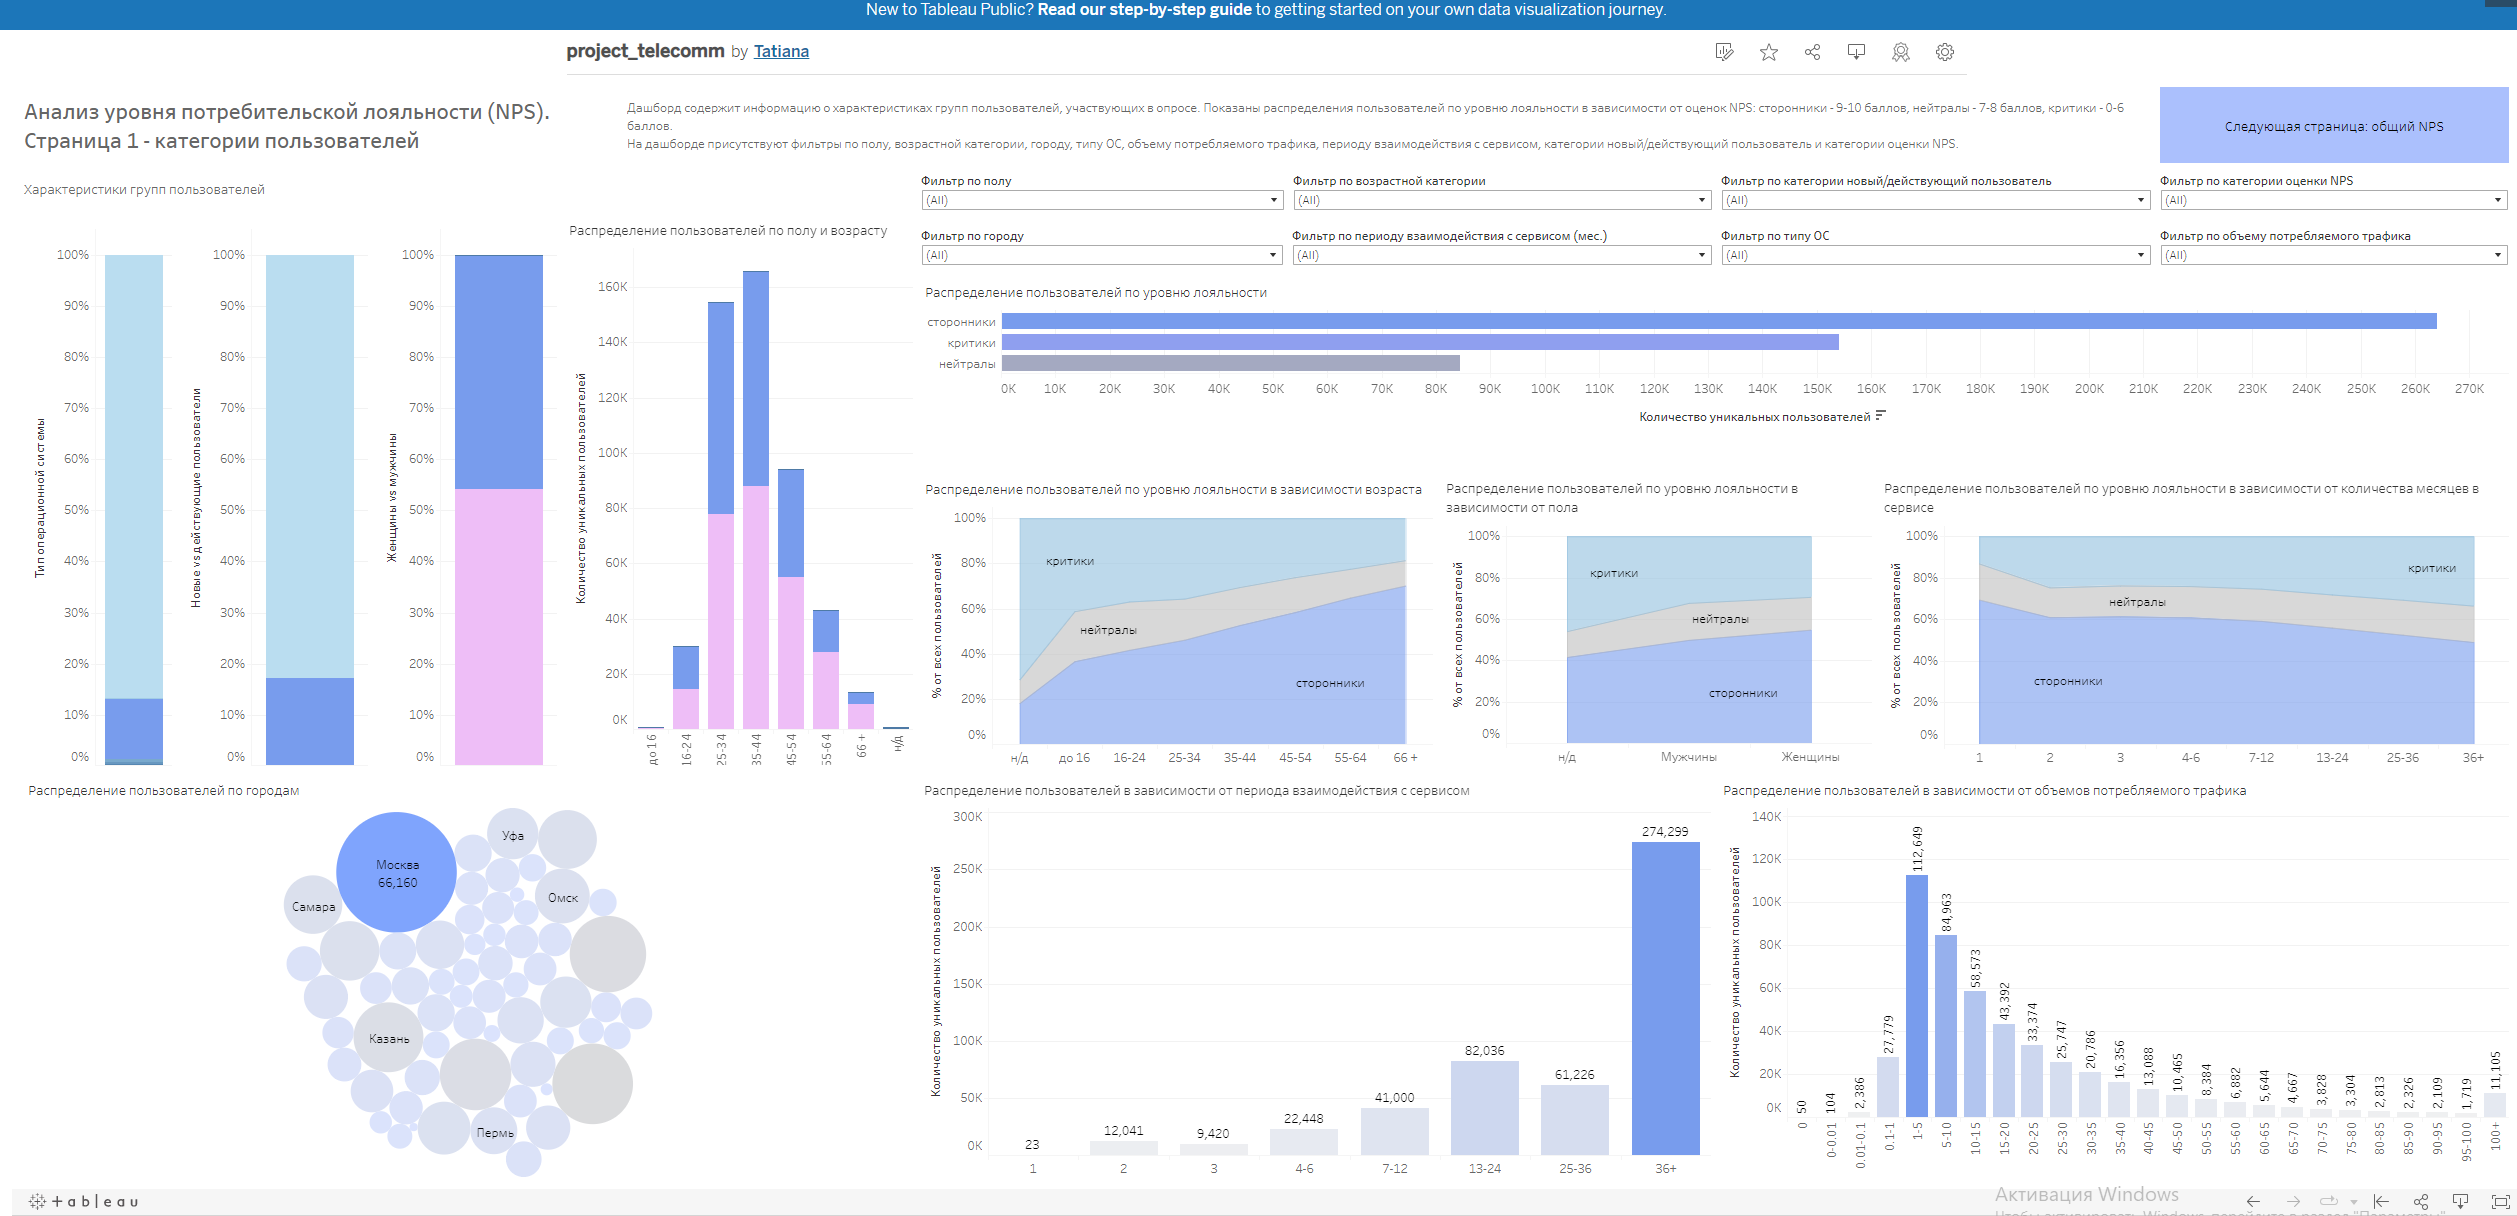

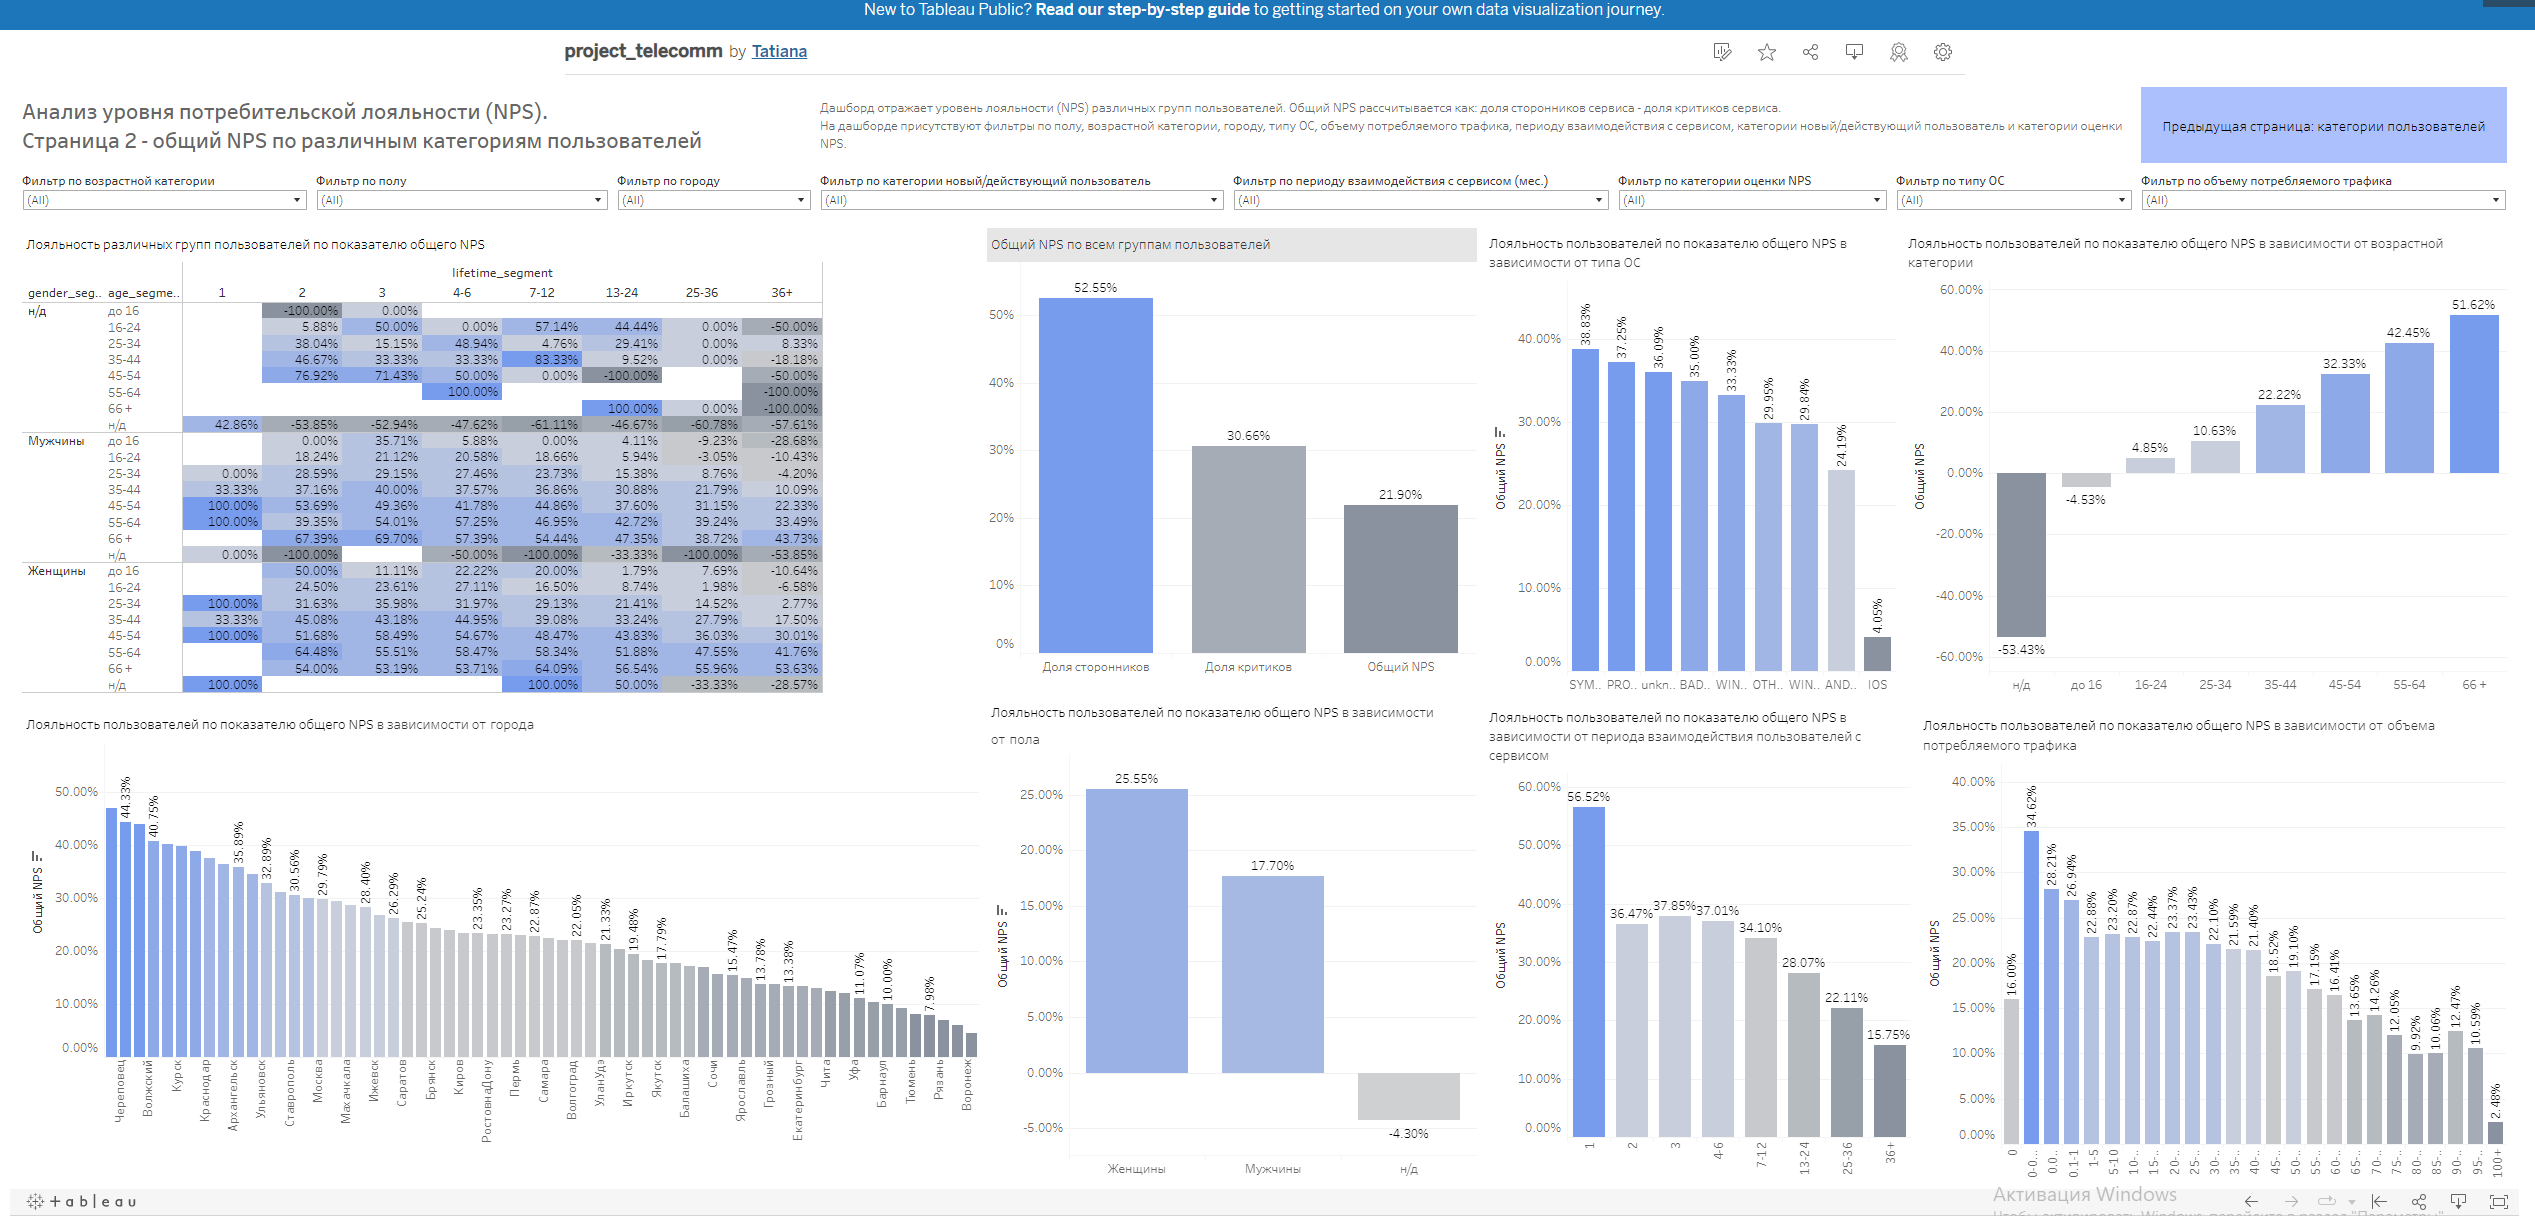

Оптимальное разрешение экрана: 2560*1440

### Презентация

**Ссылка на презентацию:** https://disk.yandex.ru/i/3CtzafypTX0j6Q